In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mplt
import pylab as plt
from matplotlib import rc
from pylab import figure, show, legend, xlabel, ylabel

In [2]:
df=pd.read_csv("coatza.csv",header=int(0))
df_b=pd.read_csv("Boston2.csv",header=int(0))

In [3]:
from datetime import datetime
df['date']= df.apply(lambda x:datetime.strptime("{0} {1} {2} {3}".format(x[u'año'],x[u'mes'], x[u'dia'], x[u'hora(utc)']), "%Y %m %d %H"),axis=1)
df_b['Date Time']=pd.to_datetime(df_b['Date Time'], format="%Y %m %d %H")

In [4]:
df.apply(lambda x: sum(x.isnull()), axis=0)

año           0
mes           0
dia           0
hora(utc)     0
altura(mm)    0
date          0
dtype: int64

In [5]:
df.columns

Index(['año', 'mes', 'dia', 'hora(utc)', 'altura(mm)', 'date'], dtype='object')

In [6]:
df.dtypes, df_b.dtypes

(año                    int64
 mes                    int64
 dia                    int64
 hora(utc)              int64
 altura(mm)             int64
 date          datetime64[ns]
 dtype: object, Date Time       datetime64[ns]
  Water Level           float64
  Sigma                 float64
  I                       int64
  L                       int64
 dtype: object)

In [7]:
df['altura(mm)']=pd.to_numeric(df['altura(mm)'], errors='coerse')

In [8]:
df.describe(), df_b.describe()

(          año    mes         dia   hora(utc)  altura(mm)
 count   744.0  744.0  744.000000  744.000000  744.000000
 mean   2016.0    7.0   16.000000   11.500000  130.516129
 std       0.0    0.0    8.950289    6.926843  145.827401
 min    2016.0    7.0    1.000000    0.000000 -282.000000
 25%    2016.0    7.0    8.000000    5.750000   42.750000
 50%    2016.0    7.0   16.000000   11.500000  170.000000
 75%    2016.0    7.0   24.000000   17.250000  240.000000
 max    2016.0    7.0   31.000000   23.000000  361.000000,
         Water Level       Sigma      I     L 
 count    720.000000  720.000000  720.0  720.0
 mean       1.658825    0.010033    0.0    0.0
 std        1.048483    0.005249    0.0    0.0
 min       -0.535000    0.001000    0.0    0.0
 25%        0.742250    0.007000    0.0    0.0
 50%        1.683500    0.009000    0.0    0.0
 75%        2.616000    0.012000    0.0    0.0
 max        3.702000    0.038000    0.0    0.0)

In [9]:
v = np.arange(0.0, 744.0, 1.0)
b = np.arange(0.0, 720.0, 1.0)

In [10]:
df['T'] = pd.Series(v, index = None)
df_b['T'] = pd.Series(b, index = None)

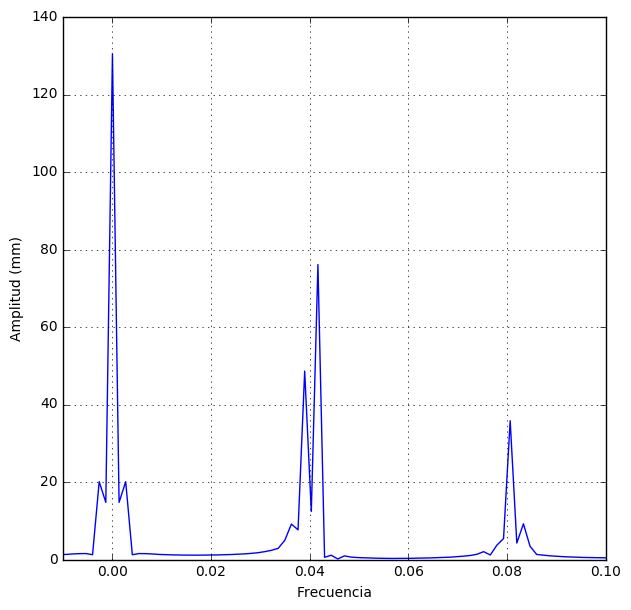

In [11]:
from scipy.fftpack import fft, fftfreq, fftshift
# number of signal points
N = 744
# sample spacing
T = 1
x = df['dia']
y = df['altura(mm)']
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)
import matplotlib.pyplot as plt
plt.plot(xf, 1.0/N * np.abs(yplot))
plt.xlim(-0.01,.10)

plt.ylabel('Amplitud (mm)')
plt.xlabel('Frecuencia')
#plt.text(0.036, 50, '$O_1$')
#plt.text(0.0801, 37.09, '$M_2$')
#plt.text(0.0401, 77, '$K_1$')
plt.grid()
fig=plt.gcf()
fig.set_size_inches(7,7)
plt.show()

In [12]:
df_b.columns

Index(['Date Time', ' Water Level', ' Sigma', ' I', ' L ', 'T'], dtype='object')

In [13]:
from scipy.fftpack import fft, fftfreq, fftshift
# number of signal points
Nb = 720
# sample spacing
Tb = 1
xb = df_b['Date Time']
yb = df_b[' Water Level']
yfb = fft(yb)
xfb = fftfreq(Nb, Tb)
xfb = fftshift(xfb)
ybplot = fftshift(yfb)

In [14]:
a = 2*np.absolute(yf)/N
b = 2*np.absolute(yfb)/Nb

In [15]:
#Esto proporciona los máximos de la gráfica
print(np.where(a[:,]>25))
b= a[a[:,]>25]
b

(array([  0,   1,   2,  29,  31,  60, 684, 713, 715, 742, 743]),)


array([ 261.03225806,   29.48340001,   40.15067979,   97.249858  ,
        152.22704134,   71.61009173,   71.61009173,  152.22704134,
         97.249858  ,   40.15067979,   29.48340001])

In [16]:
#Amplitudes Coatza

A0 = np.absolute(yf[int(0),]/N)
A1 = 2*np.absolute(yf[1,]/N)
A2 = 2*np.absolute(yf[2,]/N)
A3 = 2*np.absolute(yf[29,]/N)
A4 = 2*np.absolute(yf[31,]/N)
A5 = 2*np.absolute(yf[60,]/N)


#Frecuencias
f1= xf[int(N/2 +1),]
f2= xf[int(N/2 +2),]
f3= xf[int(N/2 +29),]
f4= xf[int(N/2 +31),]
f5= xf[int(N/2 +60),]

#Fases
O1= np.angle(yf[1,])
O2= np.angle(yf[2,])
O3= np.angle(yf[29,])
O4= np.angle(yf[31,])
O5= np.angle(yf[60,])


In [17]:
y= df['altura(mm)']/1000
w= 2*np.pi
a=0
def f(t):
    return A0+ (A1*np.cos(w*f1*t+O1) + A2*np.cos(w*f2*t+O2) + A3*np.cos(w*f3*t+O3) + A4*np.cos(w*f4*t+O4) + A5*np.cos(w*f5*t+O5))

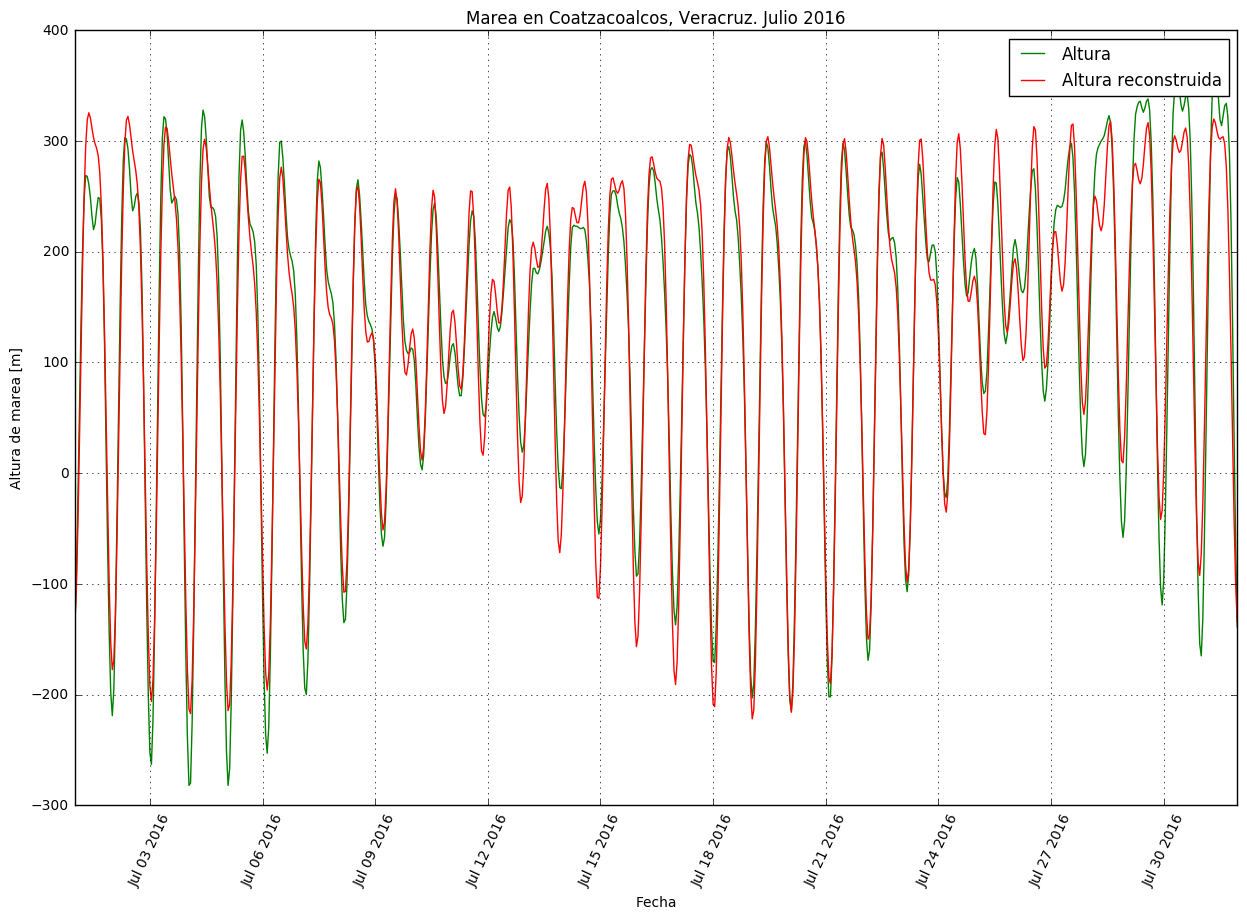

In [18]:
plt.plot(df[u'date'], df[u'altura(mm)'], 'g', label="Altura")
plt.plot(df['date'], f(df['T']), 'r-', label='Altura reconstruida')
plt.ylabel('Altura de marea [m]')
plt.xlabel('Fecha')
plt.title('Marea en Coatzacoalcos, Veracruz. Julio 2016')
plt.grid(True)
plt.legend()
locs, labels = plt.xticks()
plt.setp(labels, rotation=65)

fig = plt.gcf()
fig.set_size_inches(15, 10)

plt.show()

In [19]:
y=df['altura(mm)']
y1=f(df['T'])

In [20]:
#Error relativo
print(sum(abs(y-y1)**2) / sum(abs(y)**2))

0.02918798042


In [21]:
c=2*np.absolute(yfb)/Nb
#Esto proporciona los máximos de la gráfica
print(np.where(c[:,]>0.045))
d= c[c[:,]>0.045]
d

(array([  0,   1,   2,   3,   6,   8,   9,  28,  30,  56,  57,  58,  59,
        60, 660, 661, 662, 663, 664, 690, 692, 711, 712, 714, 717, 718, 719]),)


array([ 3.31765   ,  0.05306973,  0.04909588,  0.06363174,  0.0581727 ,
        0.05366788,  0.07240703,  0.08907565,  0.07265149,  0.06159245,
        0.36913406,  1.38891404,  0.08969095,  0.26088728,  0.26088728,
        0.08969095,  1.38891404,  0.36913406,  0.06159245,  0.07265149,
        0.08907565,  0.07240703,  0.05366788,  0.0581727 ,  0.06363174,
        0.04909588,  0.05306973])

In [22]:
#Amplitudes Coatza

B0 = np.absolute(yfb[int(0),]/Nb)
B1 = 2*np.absolute(yfb[1,]/Nb)
B2 = 2*np.absolute(yfb[2,]/Nb)
B3 = 2*np.absolute(yfb[3,]/Nb)
B4 = 2*np.absolute(yfb[6,]/Nb)
B5 = 2*np.absolute(yfb[8,]/Nb)
B6 = 2*np.absolute(yfb[int(9),]/Nb)
B7 = 2*np.absolute(yfb[28,]/Nb)
B8 = 2*np.absolute(yfb[30,]/Nb)
B9 = 2*np.absolute(yfb[56,]/Nb)
B10 = 2*np.absolute(yfb[57,]/Nb)
B11 = 2*np.absolute(yfb[58,]/Nb)
B12 = 2*np.absolute(yfb[int(59),]/Nb)
B13 = 2*np.absolute(yfb[60,]/Nb)

#Frecuencias
bf1= xfb[int(Nb/2 +1),]
bf2= xfb[int(Nb/2 +2),]
bf3= xfb[int(Nb/2 +3),]
bf4= xfb[int(Nb/2 +6),]
bf5= xfb[int(Nb/2 +8),]
bf6= xfb[int(Nb/2 +9),]
bf7= xfb[int(Nb/2 +28),]
bf8= xfb[int(Nb/2 +30),]
bf9= xfb[int(Nb/2 +56),]
bf10= xfb[int(Nb/2 +57),]
bf11= xfb[int(Nb/2 +58),]
bf12= xfb[int(Nb/2 +59),]
bf13= xfb[int(Nb/2 +60),]

#Fases
bO1= np.angle(yfb[1,])
bO2= np.angle(yfb[2,])
bO3= np.angle(yfb[3,])
bO4= np.angle(yfb[6,])
bO5= np.angle(yfb[8,])
bO6= np.angle(yfb[9,])
bO7= np.angle(yfb[28,])
bO8= np.angle(yfb[30,])
bO9= np.angle(yfb[56,])
bO10= np.angle(yfb[57,])
bO11= np.angle(yfb[58,])
bO12= np.angle(yfb[59,])
bO13= np.angle(yfb[60,])

In [23]:
y= df['altura(mm)']/1000
w= 2*np.pi
a=0
def f(t):
    return B0+ (B1*np.cos(w*bf1*t+bO1) + B2*np.cos(w*bf2*t+bO2) 
                + B3*np.cos(w*bf3*t+bO3) + B4*np.cos(w*bf4*t+bO4) 
                + B5*np.cos(w*bf5*t+bO5) + B6*np.cos(w*bf6*t+bO6) 
                + B7*np.cos(w*bf7*t+bO7) + B8*np.cos(w*bf8*t+bO8) 
                + B9*np.cos(w*bf9*t+bO9) + B10*np.cos(w*bf10*t+bO10) 
                + B11*np.cos(w*bf11*t+bO11) + B12*np.cos(w*bf12*t+bO12) 
                + B13*np.cos(w*bf13*t+bO13))

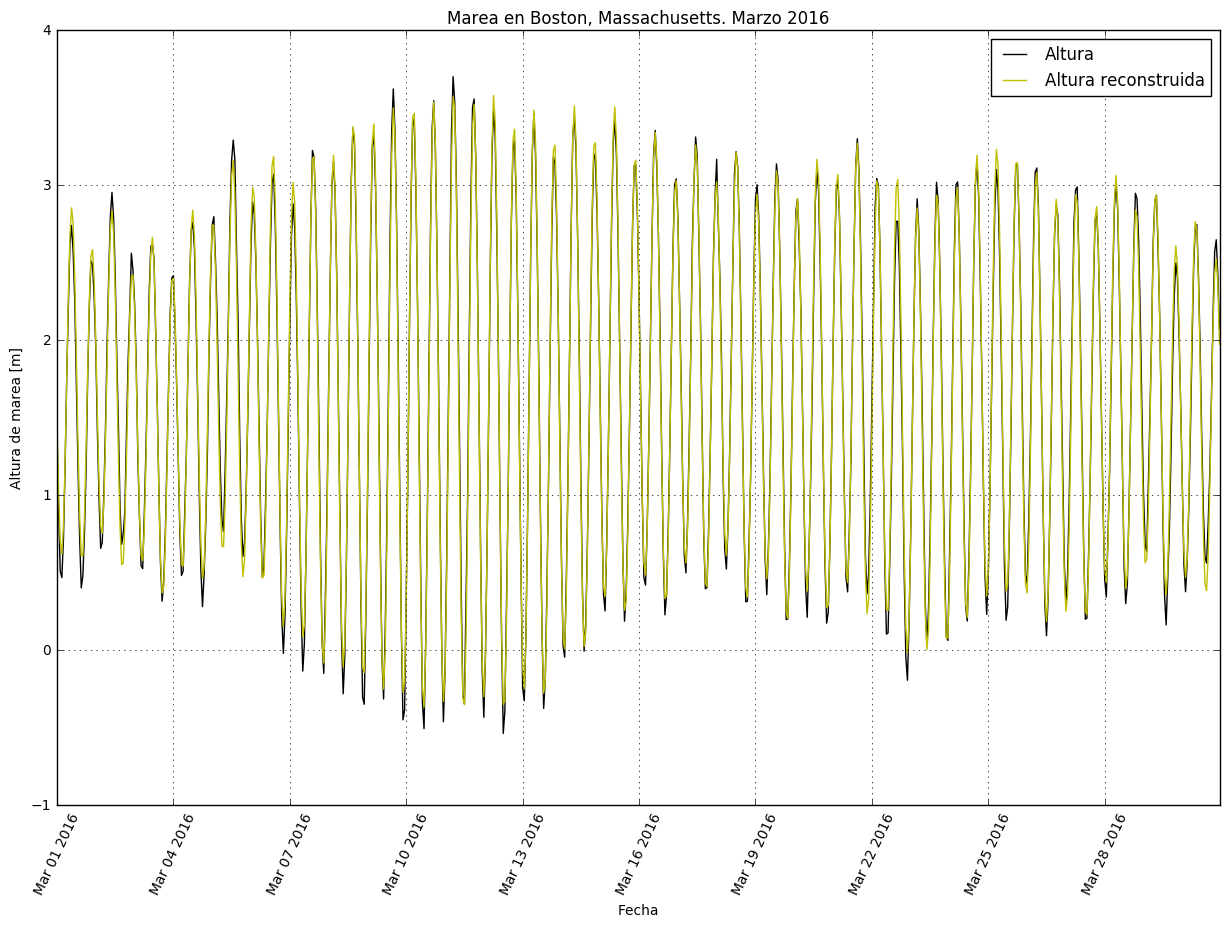

In [25]:
plt.plot(df_b[u'Date Time'], df_b[u' Water Level'], 'k', label="Altura")
plt.plot(df_b['Date Time'], f(df_b['T']), 'y-', label='Altura reconstruida')
plt.ylabel('Altura de marea [m]')
plt.xlabel('Fecha')
plt.title('Marea en Boston, Massachusetts. Marzo 2016')
#plt.xlim(pd.Timestamp('2016-03-13 00:00:00'), pd.Timestamp('2016-03-14 00:00:00') )
plt.grid(True)
plt.legend()
locs, labels = plt.xticks()
plt.setp(labels, rotation=65)

fig = plt.gcf()
fig.set_size_inches(15, 10)

plt.show()